In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline

In [78]:
df = pd.read_csv(r'Bond-VN.csv', index_col= 0,parse_dates=True)
df = df[['GGVF5Y','GGVF1Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]


In [79]:
X = df.drop('GGVF5Y', axis=1)
y = df['GGVF5Y']

In [80]:
X

,GGVF1Y,CPI,FER,Baserate,FIR,Stockreturn,Fiscal,Pubdebt,CurrentAcc
Time,,,,,,,,,
2006-07-01,0.06150,0.368,13384067982,8.25,5.5000,-18.072499,1.22461,38.406899,-0.2
2006-08-01,0.06063,0.381,13384067982,8.25,5.4375,16.280391,1.22461,38.406899,-0.2
2006-09-01,0.07600,0.281,13384067982,8.25,5.3750,7.237673,1.22461,38.406899,-0.2
2006-10-01,0.07767,0.280,13384067982,8.25,5.3750,-2.883830,1.22461,38.406899,-0.2
2006-11-01,0.07817,0.572,13384067982,8.25,5.5000,23.753763,1.22461,38.406899,-0.2
...,...,...,...,...,...,...,...,...,...
2019-08-01,0.02800,0.275,68812100000,9.00,2.2500,-0.766392,-4.40000,57.500000,2.2
2019-09-01,0.02729,0.319,68812100000,9.00,2.2500,1.270248,-4.40000,57.500000,2.2
2019-10-01,0.02343,0.583,68812100000,9.00,2.0000,0.226780,-4.40000,57.500000,2.2


In [81]:
from sklearn.model_selection import train_test_split
n_state = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=n_state)

In [82]:
index_y = y_test.index
y_test_1 = y_test

In [83]:
y_test_1

Time
2019-07-01    0.03622
2013-03-01    0.08500
2011-01-01    0.11431
2008-06-01    0.20333
2017-10-01    0.04610
2009-10-01    0.10233
2012-07-01    0.09883
2007-07-01    0.07559
2017-06-01    0.04940
2019-04-01    0.03915
2011-06-01    0.12600
2012-10-01    0.10208
2016-06-01    0.06130
2015-12-01    0.06604
2014-09-01    0.05472
2010-07-01    0.10551
2013-09-01    0.08633
2016-04-01    0.06378
2016-12-01    0.05600
2011-04-01    0.12473
2007-11-01    0.08617
2009-11-01    0.11191
2018-01-01    0.03400
2008-08-01    0.16475
2017-04-01    0.05310
2014-10-01    0.05168
2008-03-01    0.08730
2018-07-01    0.03825
2012-11-01    0.09833
2019-09-01    0.03086
2009-05-01    0.09178
2009-09-01    0.10028
2018-05-01    0.03575
Name: GGVF5Y, dtype: float64

In [84]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [85]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

X_test = sc_X.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test)

In [86]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

In [87]:
y_rbf = svr_rbf.fit(X_train, y_train)
y_rbf = y_rbf.predict(X_test)
y_rbf = sc_y.inverse_transform(y_rbf)

y_lin = svr_lin.fit(X_train, y_train)
y_lin = y_lin.predict(X_test)
y_lin = sc_y.inverse_transform(y_lin)

y_poly = svr_poly.fit(X_train, y_train)
y_poly = y_poly.predict(X_test)
y_poly = sc_y.inverse_transform(y_poly)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [88]:
y_test = y_test.reshape(1,-1)

adj_y_test = []
for i in y_test:
    for j in i:
        adj_y_test.append(j)

adj_y_lin = []
for k in y_lin:
    adj_y_lin.append(k)

adj_y_rbf = []
for m in y_rbf:
    adj_y_rbf.append(m)

adj_y_poly = []
for p in y_poly:
    adj_y_poly.append(p)

In [89]:
concatenate_frame = pd.DataFrame({'Real': y_test_1,
                                'RBF model':adj_y_rbf,
                                'Linear model':adj_y_lin,
                                'Polynomial model': adj_y_poly}, index= index_y)
concatenate_frame.sort_index(inplace=True)

In [90]:
concatenate_frame.sort_index(inplace=True)

In [91]:
concatenate_frame.to_excel('SVR_5y.xlsx')

In [92]:
concatenate_frame

,Real,RBF model,Linear model,Polynomial model
Time,,,,
2007-07-01,0.07559,0.077849,0.075815,0.075695
2007-11-01,0.08617,0.081568,0.083812,0.094369
2008-03-01,0.08730,0.093514,0.083221,0.102541
2008-06-01,0.20333,0.118272,0.191542,0.256674
2008-08-01,0.16475,0.128824,0.164747,0.168006
2009-05-01,0.09178,0.099438,0.097881,0.103193
2009-09-01,0.10028,0.100571,0.102510,0.098403
2009-10-01,0.10233,0.099035,0.103548,0.098650
2009-11-01,0.11191,0.099768,0.109992,0.108864


In [93]:
concatenate_frame.describe()

,Real,RBF model,Linear model,Polynomial model
count,33.000000,33.000000,33.000000,33.000000
mean,0.081240,0.078366,0.081232,0.087368
std,0.039195,0.032051,0.038933,0.043814
min,0.030860,0.027037,0.029344,0.035828
25%,0.051680,0.049013,0.050578,0.060898
50%,0.085000,0.081568,0.083221,0.084980
75%,0.102080,0.100755,0.103386,0.098650
max,0.203330,0.133325,0.191542,0.256674


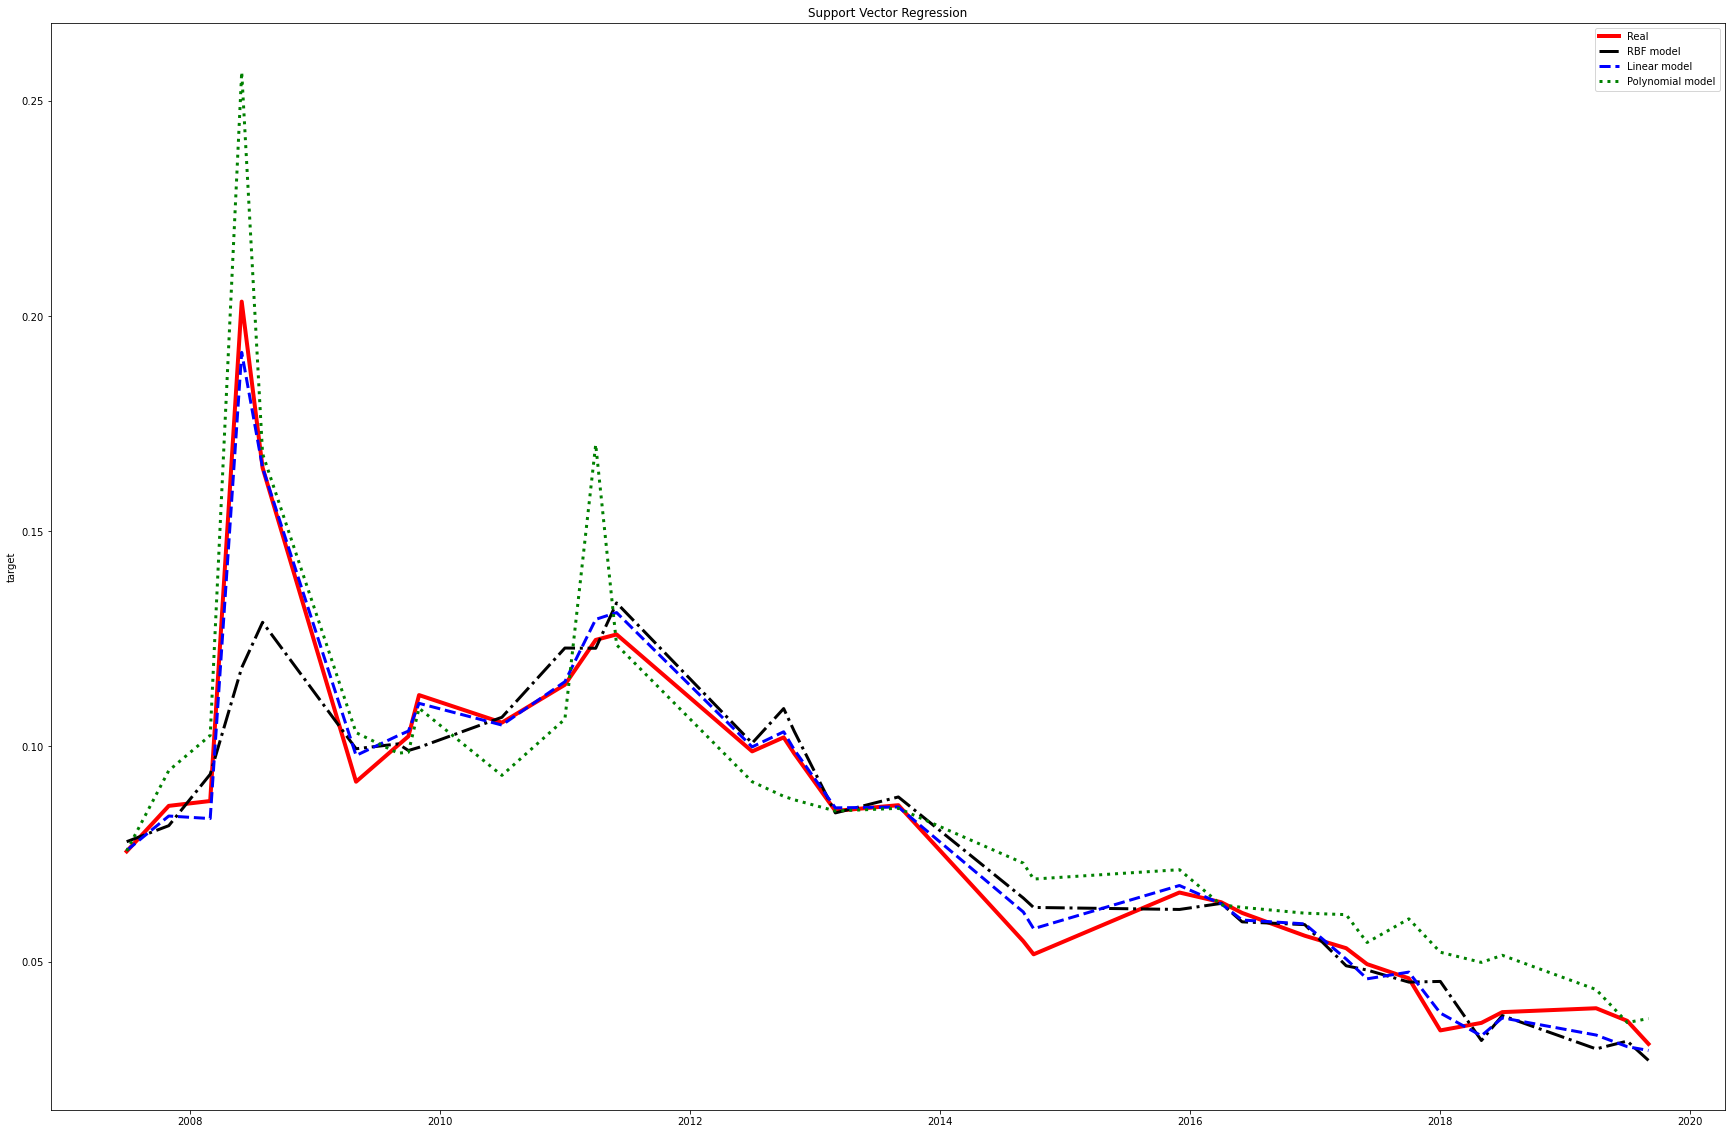

In [102]:
plt.figure(figsize=(30,20))

plt.plot(concatenate_frame.Real, color='red',label='Real',linewidth= 4)
plt.plot(concatenate_frame['RBF model'], color='black',linestyle ='-.',label='RBF model',linewidth= 3)
plt.plot(concatenate_frame['Linear model'], color='blue',linestyle ='--', label='Linear model',linewidth= 3)
plt.plot(concatenate_frame['Polynomial model'], color='g',linestyle =':', label='Polynomial model',linewidth= 3)

plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [95]:
import math

In [96]:
rmse = math.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['RBF model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['RBF model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['RBF model']))*100

In [97]:
print('RBF model:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAE  = {round(mae,6)}')
print(f'MAPE = {round(mape,2)}%')


RBF model:
RMSE = 0.017017
MAE  = 0.00797
MAPE = 9.0%


In [98]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['Linear model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['Linear model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['Linear model']))*100

In [99]:
print('Linear model:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAE  = {round(mae,6)}')
print(f'MAPE = {round(mape,2)}%')


Linear model:
RMSE = 0.003818
MAE  = 0.002849
MAPE = 4.52%


In [100]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['Polynomial model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['Polynomial model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['Polynomial model']))*100

In [101]:
print('Polynomial model:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAE  = {round(mae,6)}')
print(f'MAPE = {round(mape,2)}%')


Polynomial model:
RMSE = 0.015247
MAE  = 0.010037
MAPE = 14.12%
